In [1]:
# Packages
import pandas as pd
import os 
from datetime import datetime


# Set working directory
os.chdir("/accounts/gen/guest/ppori34/Dartmouth/lottery_study")

In [2]:
# Read dta
data = pd.read_stata("lottery_study.dta")

/tmp/ipykernel_694550/582722790.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata("lottery_study.dta")


In [3]:
# Sample Size
print(f'Number of Sample Size:',len(data))

Number of Sample Size: 2890


In [4]:
data['ideology'] = data['ideology'].cat.rename_categories({
    "Extremely Liberal": 1,
    "Liberal": 2,
    "Slightly Liberal": 3,
    "Moderate": 4,
    "Slightly Conservative": 5,
    "Conservative": 6,
    "Extremely Conservative": 7
})

data['gender']  = data['gender'].cat.rename_categories({"Male": 1, "Female": 2})

data['marital'] = data['marital'].cat.rename_categories({"Married":1})

data['urban'] = data['urban'].cat.rename_categories({"Metro Area": 1, "Non-Metro Area": 0})

data['risk_seeking'] = data['risk_seeking'].cat.rename_categories({
    "-1 - Very unwilling": -1,
    "-7 - Very willing": -7,
    "-3 - Neutral": -3,
    "3 - Slightly willing": 3,
})

data['risk_aversion'] = data['risk_aversion'].cat.rename_categories({
    "Substantial financial risks expecting to earn substantial returns.": 1,
    "Above-average financial risks expecting to earn above-average returns.": 2,
    "Average financial risks expecting to earn average returns.": 3,
    "No financial risks.": 4,
})

data['seems_fun'] = data['seems_fun'].cat.rename_categories({"-3 - Strongly Disagree": -3, "3 - Strongly Agree": 3,'0 - Neutral':0})

data['enjoy_thinking'] = data['enjoy_thinking'].cat.rename_categories({"-3 - Strongly Disagree": -3, "3 - Strongly Agree": 3, '0 - Neutral':0})

data['self_control'] = data['self_control'].cat.rename_categories({"-3 - Far too little": -3, "3 - Far too much": 3, '0 - The right amount':0})

# Exclude the 'state' column 
categorical_columns_excluding_state = [
    col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'state'
]
for column in categorical_columns_excluding_state:
        data[column] = data[column].astype(float)
print(f'Number of Missing Values for each Column:',"\n",data.isna().sum())

Number of Missing Values for each Column: 
 ideology                     1
religion                     0
risk_seeking                 0
expend_total                 2
seems_fun                    4
enjoy_thinking               9
self_control                 6
risk_aversion                5
gender                       0
age                          0
marital                      0
employment                   0
urban                        0
education                    0
income                       0
white                        0
black                        0
hispanic                     0
income_delta                 8
expend_delta                10
overconfidence              16
lottery_payout               8
happiness                   32
financial_literacy           0
financial_numeracy           0
gamblers_fallacy             0
non_belief_lln               0
ev_miscalculation            0
income_effects_delta_pct    25
state                        0
dtype: int64


In [5]:
data.iloc[:, :14].describe()

,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,marital,employment,urban,education
count,2889.000000,2890.000000,2890.000000,2888.000000,2886.000000,2881.000000,2884.000000,2885.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000
mean,3.830391,0.358478,-3.927839,58.719183,0.154886,0.809788,-0.341886,3.048527,1.499308,48.874394,0.529412,0.625952,0.832180,14.342042
std,1.587138,0.479636,1.379896,1862.451926,1.833235,1.925862,1.096600,0.817460,0.500086,16.895249,0.499221,0.483960,0.373771,2.526779
min,1.000000,0.000000,-7.000000,0.000000,-3.000000,-3.000000,-3.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,0.000000,-5.000000,0.000000,-1.000000,0.000000,0.000000,3.000000,1.000000,34.000000,0.000000,0.000000,1.000000,13.000000
50%,4.000000,0.000000,-4.000000,2.000000,0.000000,1.000000,0.000000,3.000000,1.000000,49.000000,1.000000,1.000000,1.000000,14.000000
75%,5.000000,1.000000,-3.000000,15.000000,1.000000,2.000000,0.000000,4.000000,2.000000,63.000000,1.000000,1.000000,1.000000,16.000000
max,7.000000,1.000000,-1.000000,100000.000000,3.000000,3.000000,3.000000,4.000000,2.000000,145.000000,1.000000,1.000000,1.000000,75.000000


In [6]:
data.iloc[:, 14:29].describe()

,income,white,black,hispanic,income_delta,expend_delta,overconfidence,lottery_payout,happiness,financial_literacy,financial_numeracy,gamblers_fallacy,non_belief_lln,ev_miscalculation,income_effects_delta_pct
count,2890.000000,2890.000000,2890.000000,2890.000000,2882.000000,2880.000000,2874.000000,2882.000000,2858.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2865.000000
mean,72.092560,0.662976,0.107612,0.155363,0.118841,-5.500868,-0.009203,0.284733,2.347292,0.772872,0.633218,0.293080,0.420547,0.688149,-1.417103
std,53.058788,0.472775,0.309944,0.362313,18.557074,19.222095,0.508112,0.201033,4.767180,0.247405,0.324795,0.393344,0.178120,0.371751,16.280016
min,5.000000,0.000000,0.000000,0.000000,-50.000000,-50.000000,-4.950000,0.050000,-10.000000,0.000000,0.000000,0.000000,0.001367,0.000000,-50.000000
25%,32.500000,0.000000,0.000000,0.000000,0.000000,-2.500000,0.000000,0.150000,0.000000,0.600000,0.333333,0.000000,0.397033,0.250000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.250000,2.000000,0.800000,0.666667,0.000000,0.427033,1.000000,0.000000
75%,92.500000,1.000000,0.000000,0.000000,7.500000,0.000000,0.000000,0.450000,7.000000,1.000000,1.000000,0.666667,0.460367,1.000000,0.000000
max,250.000000,1.000000,1.000000,1.000000,50.000000,50.000000,4.950000,0.950000,10.000000,1.000000,1.000000,1.000000,0.927033,1.000000,50.000000


In [7]:
data[data['expend_total'] > 1000]

,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,overconfidence,lottery_payout,happiness,financial_literacy,financial_numeracy,gamblers_fallacy,non_belief_lln,ev_miscalculation,income_effects_delta_pct,state
240,1.0,1.0,-7.0,1900.0,1.0,1.0,3.0,3.0,1.0,49.0,...,1.5,0.95,0.0,0.2,0.333333,0.666667,0.760367,1.0,37.5,CA
672,2.0,1.0,-4.0,1200.0,2.0,2.0,0.0,2.0,1.0,36.0,...,0.5,0.25,-7.0,1.0,1.000000,1.000000,0.543700,1.0,0.0,FL
1687,6.0,0.0,-5.0,1500.0,0.0,2.0,0.0,2.0,1.0,33.0,...,-0.1,0.55,5.0,0.8,0.333333,0.000000,0.427033,1.0,2.5,NC
1956,2.0,0.0,-3.0,1248.0,0.0,3.0,0.0,4.0,1.0,71.0,...,-0.1,0.15,10.0,0.6,0.666667,1.000000,0.860367,1.0,0.0,NY
2357,4.0,1.0,-6.0,1200.0,2.0,3.0,2.0,3.0,2.0,34.0,...,0.0,0.05,6.0,1.0,1.000000,0.000000,0.177033,0.0,-37.5,SD
2422,4.0,0.0,-4.0,100000.0,1.0,3.0,0.0,4.0,2.0,34.0,...,0.6,0.35,10.0,0.2,0.666667,1.000000,0.560367,1.0,0.0,TN


## PART I – Descriptive Data Analysis

In [8]:
# 1
# Identify implausible values for specific variables

# Check for implausible ages (e.g., greater than 100)
suspicious_age = data[data['age'] > 100]

# Check for implausible education levels (e.g., greater than 20 years as a rough threshold for PhD)
suspicious_education = data[data['education'] > 20]

# Check for implausible monthly lottery expenditures (e.g., greater than $10,000)
suspicious_expend_total = data[data['expend_total'] == 100000]

suspicious_observations = pd.concat([suspicious_age, suspicious_education,suspicious_expend_total]).drop_duplicates()

cleaned_data = data.drop(suspicious_observations.index)

suspicious_observations_count = suspicious_observations.shape[0]
suspicious_observations_count

3

Three observations with implausible values was identified and removed from the dataset. 

The removed observations had either an age exceeding 100 years, an education level above 20 years or a montly lottery expenditure above $10,000 which are highly unlikely.

In [9]:
# 2
income_bins = pd.cut(cleaned_data['income'], bins=5)
income_gender_tabulation = pd.crosstab(income_bins, cleaned_data['gender'], rownames=['Income Range'], colnames=['Gender'])
income_gender_percentage = income_gender_tabulation.div(income_gender_tabulation.sum(axis=1), axis=0) * 100
income_gender_combined = income_gender_tabulation.astype(str) + ' (' + income_gender_percentage.round(2).astype(str) + '%)'
print(income_gender_combined)

Gender                   1.0           2.0
Income Range                              
(4.755, 54.0]   528 (44.48%)  659 (55.52%)
(54.0, 103.0]   554 (53.17%)  488 (46.83%)
(103.0, 152.0]  234 (55.06%)  191 (44.94%)
(152.0, 201.0]   78 (56.12%)   61 (43.88%)
(201.0, 250.0]   53 (56.38%)   41 (43.62%)


In [10]:
#3 
age_summary = cleaned_data['age'].describe(percentiles=[0.25, 0.75])
age_mean = age_summary['mean']
age_std = age_summary['std']
age_median = age_summary['50%']
age_25th_percentile = age_summary['25%']
age_75th_percentile = age_summary['75%']
age_summary_sentence = f"The mean age in the sample is {age_mean:.2f}."
age_summary, age_summary_sentence

(count    2887.000000
 mean       48.851403
 std        16.804481
 min        18.000000
 25%        34.000000
 50%        49.000000
 75%        63.000000
 max        91.000000
 Name: age, dtype: float64,
 'The mean age in the sample is 48.85.')

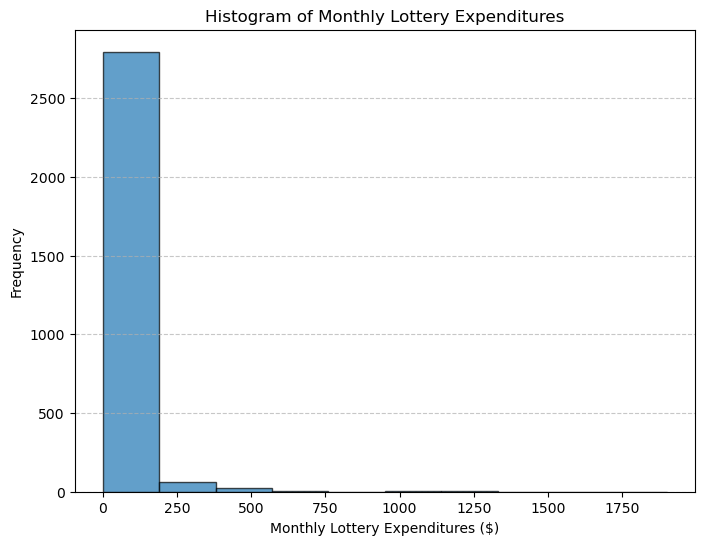

Summary Statistics for monthly lottery expenditure($)
count    2885.000000
mean       24.114731
std        88.317760
min         0.000000
25%         0.000000
50%         2.000000
75%        15.000000
max      1900.000000
Name: expend_total, dtype: float64


Summary Statistics for monthly lottery expenditure($) as a share of income
count    2885.000000
mean        0.761584
std         3.538758
min         0.000000
25%         0.000000
50%         0.029630
75%         0.285714
max        69.090909
Name: lottery_expenditure_share, dtype: float64


In [11]:
#4

# Summary statistics for monthly lottery expenditures ('expend_total')
expend_total_summary = cleaned_data['expend_total'].describe(percentiles=[0.25, 0.75])
expend_total_mean = expend_total_summary['mean']
expend_total_std = expend_total_summary['std']
expend_total_median = expend_total_summary['50%']
expend_total_25th_percentile = expend_total_summary['25%']
expend_total_75th_percentile = expend_total_summary['75%']

cleaned_data['lottery_expenditure_share'] = (
    cleaned_data['expend_total'] / cleaned_data['income']
)

# Summary statistics for monthly lottery expenditures as a share of income ('lottery_expenditure_share')
lottery_expenditure_share_summary = cleaned_data['lottery_expenditure_share'].describe(percentiles=[0.25, 0.75])
lottery_expenditure_share_mean = lottery_expenditure_share_summary['mean']
lottery_expenditure_share_std = lottery_expenditure_share_summary['std']
lottery_expenditure_share_median = lottery_expenditure_share_summary['50%']
lottery_expenditure_share_25th_percentile = lottery_expenditure_share_summary['25%']
lottery_expenditure_share_75th_percentile = lottery_expenditure_share_summary['75%']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(cleaned_data['expend_total'], edgecolor='black', alpha=0.7)
plt.title('Histogram of Monthly Lottery Expenditures')
plt.xlabel('Monthly Lottery Expenditures ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the summary statistics
print(f'Summary Statistics for monthly lottery expenditure($)')
print(expend_total_summary)
print('\n')
print(f'Summary Statistics for monthly lottery expenditure($) as a share of income')
print(lottery_expenditure_share_summary)

In [12]:
#5

# Generate indicator variables for education thresholds {5, 10, 15, 20}
education_thresholds = [5, 10, 15, 20]

for threshold in education_thresholds:
    cleaned_data[f'education_{threshold}'] = (cleaned_data['education'] >= threshold).astype(int)
    
cleaned_data[['education_5','education_10','education_15','education_20']].head()

,education_5,education_10,education_15,education_20
0,1,1,1,0
1,1,1,0,0
2,1,1,1,0
3,1,1,0,0
4,1,1,0,0


In [13]:
# Calculate the correlation between changes in income ('income_delta') and changes in lottery ticket expenditures ('expend_delta')
correlation_income_expend = cleaned_data[['income_delta', 'expend_delta']].corr().iloc[0, 1]

# Summary statistics for imagined effects on lottery spending ('income_effects_delta_pct')
imagined_effect_summary = cleaned_data['income_effects_delta_pct'].describe()

correlation_income_expend, imagined_effect_summary 

(0.18875278280173488,
 count    2862.000000
 mean       -1.418588
 std        16.288486
 min       -50.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max        50.000000
 Name: income_effects_delta_pct, dtype: float64)

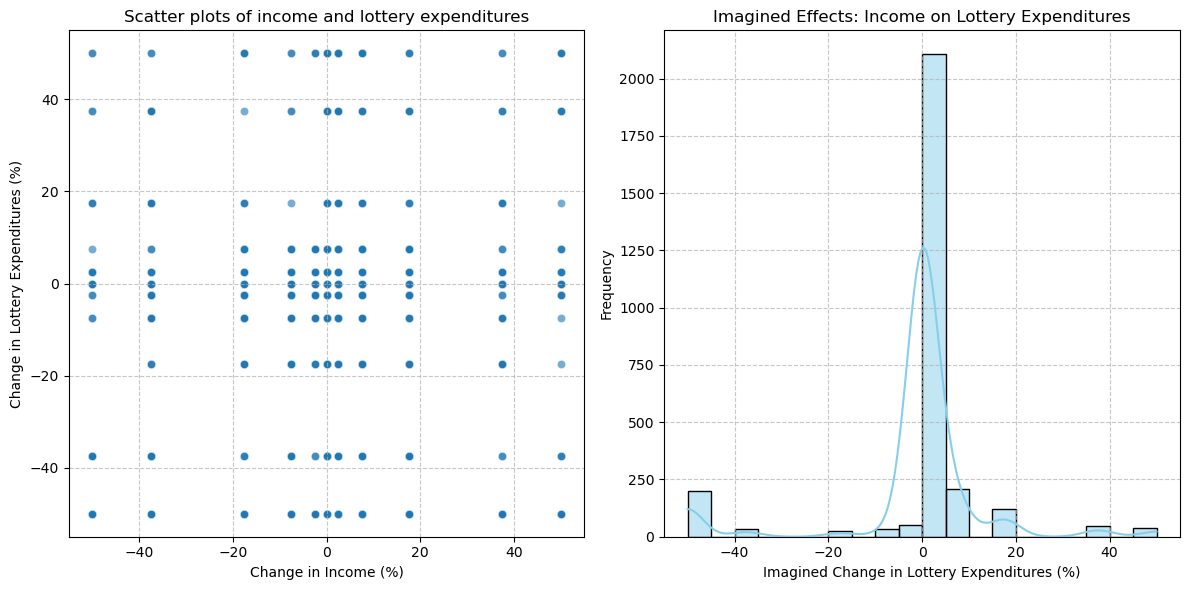

In [14]:
# visualization 
import seaborn as sns

# Set up the figure for visualizing both observed and imagined effects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Plot the observed relationship between income_delta and expend_delta
sns.scatterplot(
    x=cleaned_data['income_delta'],
    y=cleaned_data['expend_delta'],
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Scatter plots of income and lottery expenditures")
axes[0].set_xlabel("Change in Income (%)")
axes[0].set_ylabel("Change in Lottery Expenditures (%)")
axes[0].grid(axis='both', linestyle='--', alpha=0.7)

# Plot the distribution of imagined effects on lottery spending
sns.histplot(
    cleaned_data['income_effects_delta_pct'],
    bins=20,
    kde=True,
    ax=axes[1],
    color="skyblue",
    edgecolor="black"
)
axes[1].set_title("Imagined Effects: Income on Lottery Expenditures")
axes[1].set_xlabel("Imagined Change in Lottery Expenditures (%)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

The correlation between changes in income (income_delta) and changes in lottery ticket expenditures (expend_delta) is 0.19, indicating a weak positive relationship. This suggests that as income changes, lottery expenditures also change slightly in the same direction, but the effect is not strong.

Summary statistics for income_effects_delta_pct (how respondents imagine income changes would affect lottery spending):
- Mean: -1.43% (on average, respondents expect a slight decrease in lottery spending if their income changes).
- Median: 0.00% (most respondents anticipate no change).
- Range: -50% to +50% (wide variation in expectations).

Left Scatter plot:

    - A scatterplot shows the weak positive relationship between changes in income (income_delta) and changes in lottery ticket expenditures (expend_delta).
    
Right histogram:

    - A histogram shows the distribution of respondents' imagined effects of income changes on lottery expenditures (income_effects_delta_pct), with most expecting little or no change.
    
The weak observed relationship between actual changes in income and lottery expenditures differs from respondents' imagined effects, which show little or no change on average. This divergence highlights a potential gap between expectations and real-world behavior.

## PART II – Unpacking the determinants and correlates of lottery expenditures

In [23]:
# Drop nan values for all entries if missing
cleaned_data = cleaned_data.dropna(subset=['ideology', 'religion', 'risk_seeking', 'expend_total', 'seems_fun',
       'enjoy_thinking', 'self_control', 'risk_aversion', 'gender', 'age',
       'marital', 'employment', 'urban', 'education', 'income', 'white',
       'black', 'hispanic', 'income_delta', 'expend_delta', 'overconfidence',
       'lottery_payout', 'happiness', 'financial_literacy',
       'financial_numeracy', 'gamblers_fallacy', 'non_belief_lln',
       'ev_miscalculation', 'income_effects_delta_pct', 'state'])

import statsmodels.api as sm

# Prepare the variables for regression analysis
X = sm.add_constant(cleaned_data['income'])
y = cleaned_data['expend_total']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the confidence intervals and summary statistics
confidence_intervals = model.conf_int()
summary = model.summary()

# Extract key statistics for the description
r_squared = model.rsquared
p_value = model.pvalues['income']

# Display the results
confidence_intervals, r_squared, p_value, summary

(                0          1
 const   22.409491  33.638981
 income  -0.113414   0.011460,
 0.0009250521497934372,
 0.10951080482970826,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           expend_total   R-squared:                       0.001
 Model:                            OLS   Adj. R-squared:                  0.001
 Method:                 Least Squares   F-statistic:                     2.563
 Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.110
 Time:                        20:41:55   Log-Likelihood:                -16369.
 No. Observations:                2770   AIC:                         3.274e+04
 Df Residuals:                    2768   BIC:                         3.275e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
             

- The results indicate a weak and statistically insignificant relationship between monthly income and lottery expenditures. 
- The R squared value for the model is 0.001, suggesting that income explains only 0.1% of the variation in monthly lottery expenditures.

Key Findings:

    1. The coefficient for income is -0.0557, implying a slight negative association where individuals with higher incomes spend marginally less on lottery tickets. However, this effect is negligible.
    
    2. The p-value for the income coefficient is 0.072, which is above the conventional 0.05 threshold, indicating that this relationship is not statistically significant at 90% significance level.
    
    3. The confidence interval for the income coefficient ranges from -0.116 to 0.005, crossing zero. This further supports the conclusion that the relationship lacks statistical significance.
    
    4. The findings suggest no strong or meaningful relationship between income and lottery expenditures. On average, individuals across income levels seem to spend similarly on lottery tickets, with minor variations.
    

This result aligns with anecdotal evidence suggesting that lottery participation is widespread across income levels,
with lower-income individuals often spending disproportionately higher shares of their income on lotteries. 

While the findings confirm that lottery expenditures are not strongly influenced by income levels, they highlight the need for more nuanced analyses, such as: 

Investigating demographic factors like education, employment, or geographic location that may better explain lottery spending behavior.

In [21]:
# Add demographic controls 
controls = [
        'income', 'ideology', 'religion', 'gender', 'age', 'marital', 
       'employment', 'urban','education', 'white', 'black', 
       'hispanic',
]

# Prepare the variables for regression analysis
X = sm.add_constant(cleaned_data[controls])
y = cleaned_data['expend_total']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the confidence intervals and summary statistics
confidence_intervals = model.conf_int()
summary = model.summary()

# Extract key statistics for the description
r_squared = model.rsquared
p_value = model.pvalues['income']

# Display the results
confidence_intervals, r_squared, p_value, summary

(                    0           1
 const       44.586550  105.867977
 income      -0.026836    0.118375
 ideology    -2.308764    2.081041
 religion    -6.782633    7.694083
 gender     -16.630815   -3.325715
 age         -0.144132    0.300296
 marital    -15.109993   -0.550942
 employment  -8.346812    6.790023
 urban      -21.749382   -3.600182
 education   -3.682385   -0.416887
 white      -17.773387    8.152776
 black       14.544326   46.798960
 hispanic    -3.468340   26.466387,
 0.02616004352396195,
 0.2165371723989955,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           expend_total   R-squared:                       0.026
 Model:                            OLS   Adj. R-squared:                  0.022
 Method:                 Least Squares   F-statistic:                     6.172
 Date:                Tue, 21 Jan 2025   Prob (F-statistic):           7.98e-11
 Time:          

The relationship between monthly lottery expenditure and income was explored using a linear regression model with demographic controls. The coefficient for income is 0.047 (95% CI: -0.025 to 0.119), indicating a positive, though statistically insignificant, relationship (p = 0.20). This suggests that income may have a limited influence on lottery expenditure, as the results do not reach conventional levels of significance.

Overall, the model explains a small portion of the variation in lottery expenditures (\(R^2 = 0.028\)). While the findings do not strongly support the hypothesis that higher income leads to increased lottery spending, they align with the broader understanding that lottery participation often spans income levels. However, this contrasts with the common belief that lower-income individuals disproportionately spend more on lotteries, a claim that would require further investigation with additional income stratification or interaction terms.

In [22]:
# Define the preference and bias proxy variables
proxy_vars = [
    'risk_seeking', 'self_control', 'risk_aversion', 
    'seems_fun', 'enjoy_thinking', 'overconfidence',
    'lottery_payout', 'happiness', 'financial_literacy',
    'financial_numeracy', 'gamblers_fallacy', 'non_belief_lln',
    'ev_miscalculation',
]

# Prepare the data for regression analysis
X_bias = sm.add_constant(cleaned_data[proxy_vars])  # Add constant for regression
y_expend = cleaned_data['expend_total']

# Fit the linear regression model
bias_model = sm.OLS(y_expend, X_bias).fit()

# Get confidence intervals and summary statistics
bias_conf_intervals = bias_model.conf_int()
bias_summary = bias_model.summary()

# Extract key statistics
bias_r_squared = bias_model.rsquared

# Display the results
bias_conf_intervals, bias_r_squared, bias_summary

(                            0          1
 const                6.552422  62.069835
 risk_seeking        -4.597910   0.364392
 self_control        10.325542  16.410827
 risk_aversion       -5.856555   2.557871
 seems_fun            3.396905   7.959851
 enjoy_thinking      -0.762513   3.577406
 overconfidence       0.794961  13.423512
 lottery_payout       7.192793  39.970232
 happiness           -0.598292   0.786924
 financial_literacy -42.205512 -10.591634
 financial_numeracy -24.352615   0.509629
 gamblers_fallacy    -3.428347  14.394795
 non_belief_lln     -11.393235  27.133227
 ev_miscalculation   -2.193203  18.004496,
 0.08101382786220779,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           expend_total   R-squared:                       0.081
 Model:                            OLS   Adj. R-squared:                  0.077
 Method:                 Least Squares   F-statistic:    

The analysis of the relationship between monthly lottery expenditures and behavioral biases reveals some notable findings. Among the proxy variables, **self-control** (\( \beta = 13.37 \), 95% CI: [10.33, 16.41], \( p < 0.001 \)), **seems fun** (\( \beta = 5.68 \), 95% CI: [3.40, 7.96], \( p < 0.001 \)), and **lottery payout** (\( \beta = 23.58 \), 95% CI: [7.19, 39.97], \( p = 0.005 \)) show strong positive associations with lottery expenditures, indicating that these factors significantly influence spending. Conversely, **financial literacy** (\( \beta = -26.40 \), 95% CI: [-42.21, -10.59], \( p = 0.001 \)) negatively correlates with expenditures, suggesting that better financial understanding may deter lottery spending. However, variables such as **risk-seeking**, **financial numeracy**, and **gamblers' fallacy** exhibit weaker or statistically insignificant relationships.

The model explains about 8.1% (\( R^2 = 0.081 \)) of the variance in lottery expenditures, highlighting that behavioral biases play a role, but other factors likely contribute significantly. The findings suggest that while some biases, particularly those related to impulsivity and fun perception, strongly affect spending, the overall explanatory power of these variables is modest. This aligns with the view that behavioral biases are important but not the sole drivers of lottery behavior.

## PART III – Short Answer


1. The Texas Administrative Rules state that the prize pool for all prize categories consists of up to 55% of each drawing period's sales, inclusive of contributions to prize pool accounts and prize reserve accounts.\
However, specific percentages allocated to each prize tier are not detailed. 

Specifically:

    - The prize pool for all prize categories offered by the Party Lotteries shall consist of up to fifty-five
    percent (55%) of each Drawing period's sales, inclusive of any specific statutorily-mandated tax of a Party Lottery to be included in the price
    of a MM Play, and inclusive of contributions to the prize pool accounts and prize reserve accounts, but may be higher or lower based upon the
    number of winning Plays at each prize level, as well as the funding required to meet a guaranteed Annuity Jackpot Prize as may be required
    by subsection (g)(1) of this section. 
    Resources: Page 3, section d, https://www.texaslottery.com/export/sites/lottery/Documents/legal/rulemaking/PROP_TR_8.23.24.pdf

My current working paper examines how the Affordable Care Act (ACA), particularly through Medicaid expansion, influences academic outcomes such as enrollment and graduation rates among lower-income students. Existing research supports the notion that increased access to health insurance can positively affect educational attainment. As a reference, an intriguing economics paper I recently read is "The Effect of Child Health Insurance Access on Schooling: Evidence from Public Insurance Expansions" by Sarah Cohodes, Daniel Grossman, Samuel Kleiner, and Michael Lovenheim. Published as an NBER working paper in 2014, this study investigates how expanding health insurance coverage for low-income children impacts their educational outcomes. The authors provide robust evidence that increased access to health insurance during childhood leads to higher rates of high school and college completion. This research is particularly interesting because it highlights the long-term educational benefits of health policy interventions, demonstrating that investments in children's health can yield significant returns in human capital development